In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

# Load Dataset

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Dataset Visualization

* shape of dataset data structure

In [3]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


* represent to ensure dataset correctly loaded

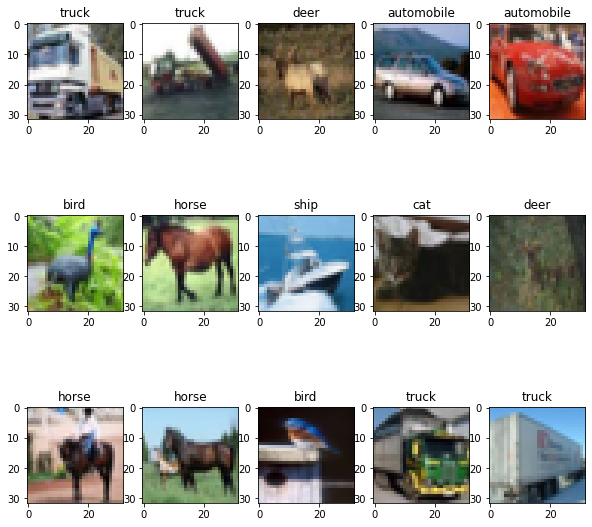

In [4]:
labels = { 0	: "airplane", 1	: "automobile", 2	: "bird", 3	: "cat", 4	: "deer", 5	: "dog", 6	: "frog", 7	: "horse", 8	: "ship", 9	: "truck"}
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    img = x_train[i]
    plt.imshow(img)
    plt.title(labels[y_train[i][0]])
plt.show()

* Ensure dataset is balance

Text(0.5, 0, 'classes of pictures')

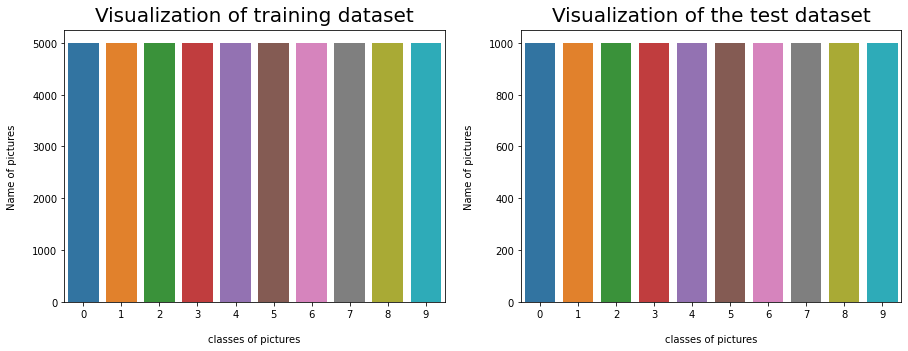

In [5]:
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(15,5)) 

sns.countplot(x=y_train.ravel(), ax=ax[0] )
ax[0].set_title("Visualization of training dataset", y=1.01, fontsize=20)
ax[0].set_ylabel("Name of pictures", labelpad=15)
ax[0].set_xlabel("classes of pictures", labelpad=15)

sns.countplot(x=y_test.ravel(), ax=ax[1] )
plt.title("Visualization of the test dataset", y=1.01, fontsize=20)
plt.ylabel("Name of pictures", labelpad=15)
plt.xlabel("classes of pictures", labelpad=15)

# Preprocess Dataset

We need tow action:

* normalize the image, because each pixel has a value between 0-255.

* make the label’s categorical.

Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network



In [6]:
# normalize
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# General Function To Evaluate Models

* unison_shuffle : shuffle tow array in unique order
* saved_model : save model after train
* heatmap, annotate_heatmap, confusion_matrix : to draw confusion matrix
* plotmodelhistory: plot acc ,loss of train and validation of a model
* classification_report: report precision, recall, f1-score, support to evaluate model

In [7]:

def unison_shuffle(a, b):
    inx = np.random.permutation(a.shape[0])
    return a[inx], b[inx]

def save_model(model, model_name):
    import os
    save_dir = os.path.join(os.getcwd(), 'saved_models')
    model_name = model_name + '.h5'
    # Save model and weights
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, model_name)
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > threshold else "black")
            texts.append(text)

    return texts
def confusion_matrix(model, x_test, y_test):
    labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    from sklearn.metrics import confusion_matrix
    pred = model.predict(x_test)
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(pred, axis=1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(y_test, axis=1)
    
    cm = confusion_matrix(Y_true, Y_pred_classes) 
    thresh = cm.max() / 2.

    fig, ax = plt.subplots(figsize=(12,12))
    im, cbar = heatmap(cm, labels, labels, ax=ax,
                      cmap=plt.cm.Blues, cbarlabel="count of predictions")
    texts = annotate_heatmap(im, data=cm, threshold=thresh)

    fig.tight_layout()
    plt.show()

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

def classification_report(model, y_test, x_test):
    from sklearn.metrics import classification_report
    y_pred = model.predict(x_test)
    y_pred_classes = [np.argmax(element) for element in y_pred]
    y_test_classes = [np.argmax(element) for element in y_test]
    print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes))



# Test Model Neuron Number
***One Layer + Different number of neuron***
* ***result***: increasing the neuron, increase model capacity, so 2048 is best one of our choice.  

In [ ]:
from tensorflow.keras.layers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=32):
    inputs = keras.Input(shape=(32, 32 ,3))
    x = Flatten()(inputs)
    x = Dense(units=neurons, activation='relu')(x)
    outputs = Dense(units=10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"],
    )
    return model

model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=32)
neurons = [64, 128, 256, 512, 1024, 2048]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train[:10000], y_train[:10000])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.407200 using {'neurons': 2048}
0.356303 (0.030144) with: {'neurons': 64}
0.383999 (0.004243) with: {'neurons': 128}
0.392500 (0.004220) with: {'neurons': 256}
0.399099 (0.010842) with: {'neurons': 512}
0.405399 (0.008897) with: {'neurons': 1024}
0.407200 (0.015437) with: {'neurons': 2048}


***Neuron Number = 2048***
* ***result***: this model is linear(no activation function), and time pass the model has been overfit

Epoch 1/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9134 - accuracy: 0.3285 - val_loss: 1.7097 - val_accuracy: 0.3969
Epoch 2/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6855 - accuracy: 0.3965 - val_loss: 1.6705 - val_accuracy: 0.4008
Epoch 3/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6158 - accuracy: 0.4261 - val_loss: 1.5744 - val_accuracy: 0.4434
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5711 - accuracy: 0.4407 - val_loss: 1.5531 - val_accuracy: 0.4517
Epoch 5/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5357 - accuracy: 0.4547 - val_loss: 1.5594 - val_accuracy: 0.4326
Epoch 6/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5079 - accuracy: 0.4623 - val_loss: 1.5430 - val_accuracy: 0.4533
Epoch 7/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4861 - accuracy: 0.4740 - val_loss: 1.5272 - val_ac

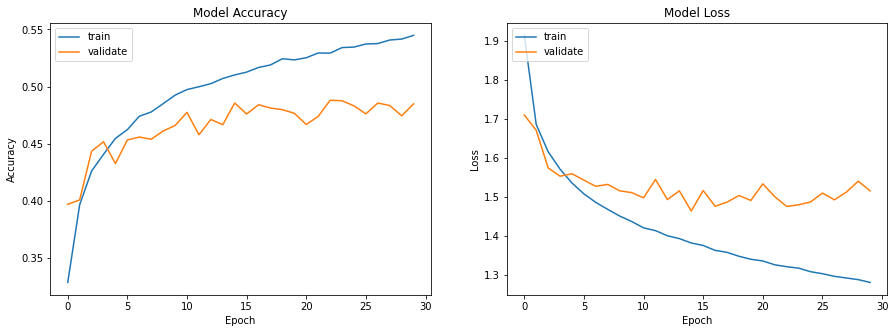

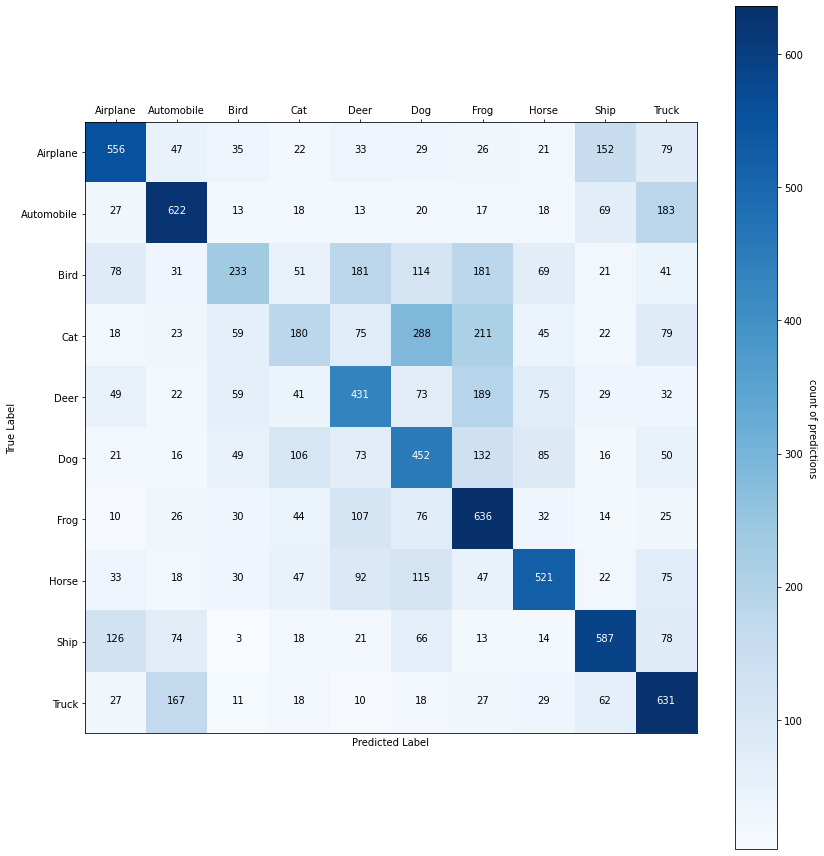

In [ ]:
model = create_model(2048)
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)

# save_model(model, 'best_neuron_number')

# Test Model Activation Function of Hidden Layer
***One Layer + Different Activation Function***
* ***result:*** best activation is softplus(a variation of relu) 

In [ ]:
from tensorflow.keras.layers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(activation='relu'):
    inputs = keras.Input(shape=(32, 32 ,3))
    x = Flatten()(inputs)
    x = Dense(units=1024, activation=activation)(x)
    outputs = Dense(units=10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"],
    )
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train[:10000], y_train[:10000])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.419999 using {'activation': 'softplus'}
0.236101 (0.004703) with: {'activation': 'softmax'}
0.419999 (0.006967) with: {'activation': 'softplus'}
0.356100 (0.001181) with: {'activation': 'softsign'}
0.392699 (0.008576) with: {'activation': 'relu'}
0.317401 (0.013417) with: {'activation': 'tanh'}
0.394599 (0.017278) with: {'activation': 'sigmoid'}
0.370600 (0.015501) with: {'activation': 'hard_sigmoid'}
0.282400 (0.023275) with: {'activation': 'linear'}


***Activation = softplus***

Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8872 - accuracy: 0.3392 - val_loss: 1.7198 - val_accuracy: 0.3839
Epoch 2/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6715 - accuracy: 0.4049 - val_loss: 1.6616 - val_accuracy: 0.4101
Epoch 3/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6068 - accuracy: 0.4289 - val_loss: 1.5908 - val_accuracy: 0.4362
Epoch 4/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5621 - accuracy: 0.4443 - val_loss: 1.6208 - val_accuracy: 0.4266
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5261 - accuracy: 0.4584 - val_loss: 1.5734 - val_accuracy: 0.4436
Epoch 6/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5013 - accuracy: 0.4670 - val_loss: 1.5625 - val_accuracy: 0.4455
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4781 - accuracy: 0.4763 - val_loss: 1.4844 - val_accuracy:

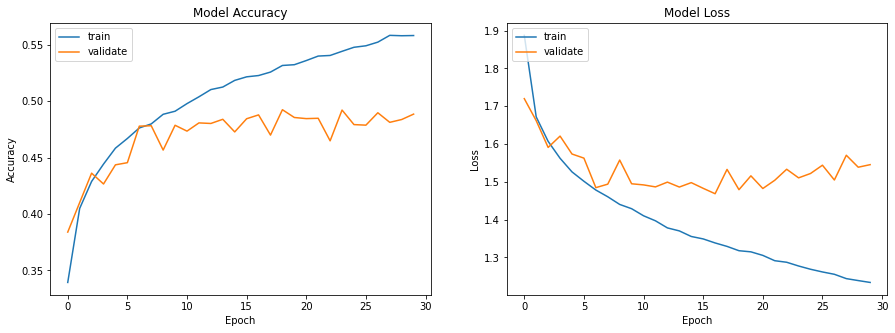

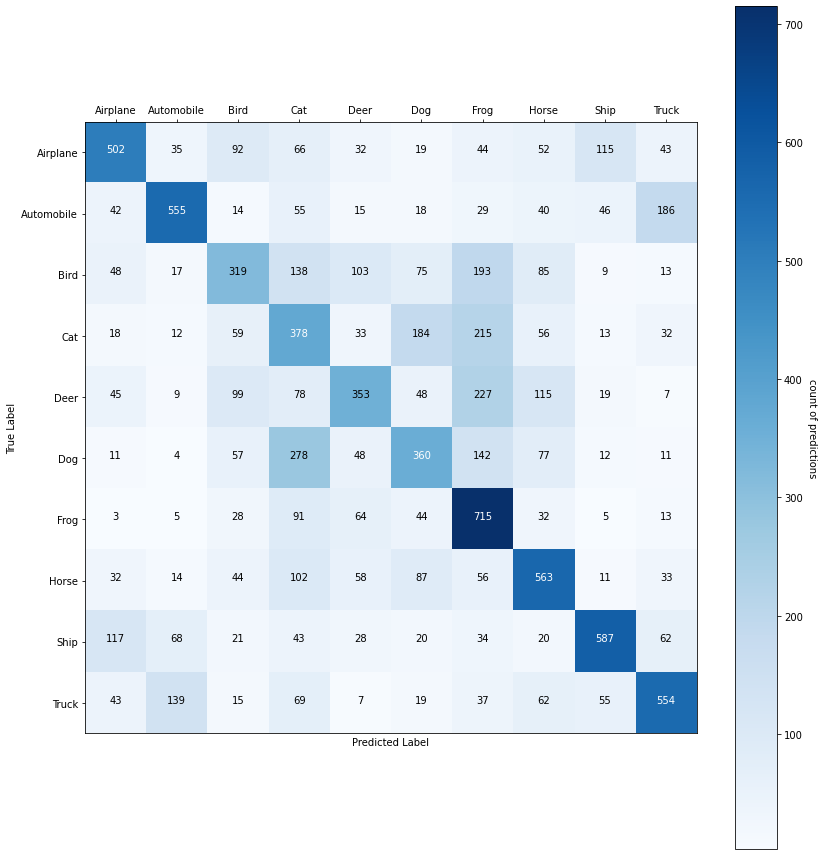

In [ ]:

model = create_model(activation='softplus')
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
# save_model(model, 'best_activation')

# Test Model Optimizer && Learning Rate
***One Layer + Different Optimizer && Learning Rate***
* ***result:*** adamax + 0.001 is the best one.

In [ ]:
from tensorflow.keras.layers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras import backend as K

def create_model(learning_rate=0.001, optimizer='adam'):
    inputs = keras.Input(shape=(32, 32 ,3))
    x = Flatten()(inputs)
    x = Dense(units=1024, activation='softplus')(x)
    outputs = Dense(units=10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    K.set_value(model.optimizer.learning_rate, learning_rate)
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
optimizer = ['SGD', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
param_grid = dict(learning_rate=learning_rate, optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train[:10000], y_train[:10000])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.429500 using {'learning_rate': 0.001, 'optimizer': 'adamax'}
0.343500 (0.006031) with: {'learning_rate': 0.001, 'optimizer': 'SGD'}
0.358594 (0.073264) with: {'learning_rate': 0.001, 'optimizer': 'rmsprop'}
0.407400 (0.003813) with: {'learning_rate': 0.001, 'optimizer': 'adam'}
0.313499 (0.009231) with: {'learning_rate': 0.001, 'optimizer': 'adadelta'}
0.369299 (0.004737) with: {'learning_rate': 0.001, 'optimizer': 'adagrad'}
0.429500 (0.010704) with: {'learning_rate': 0.001, 'optimizer': 'adamax'}
0.407101 (0.007889) with: {'learning_rate': 0.001, 'optimizer': 'nadam'}
0.207998 (0.010720) with: {'learning_rate': 0.001, 'optimizer': 'ftrl'}
0.312105 (0.039181) with: {'learning_rate': 0.01, 'optimizer': 'SGD'}
0.218099 (0.025003) with: {'learning_rate': 0.01, 'optimizer': 'rmsprop'}
0.102300 (0.002955) with: {'learning_rate': 0.01, 'optimizer': 'adam'}
0.354200 (0.005013) with: {'learning_rate': 0.01, 'optimizer': 'adadelta'}
0.372498 (0.019778) with: {'learning_rate': 0.01, 'op

***optimizer='adamax' && learning_rate=0.001***

Epoch 1/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8760 - accuracy: 0.3431 - val_loss: 1.7038 - val_accuracy: 0.4016
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6574 - accuracy: 0.4135 - val_loss: 1.6253 - val_accuracy: 0.4211
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5684 - accuracy: 0.4472 - val_loss: 1.5544 - val_accuracy: 0.4496
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5015 - accuracy: 0.4723 - val_loss: 1.5089 - val_accuracy: 0.4662
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4508 - accuracy: 0.4897 - val_loss: 1.5017 - val_accuracy: 0.4662
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4109 - accuracy: 0.5054 - val_loss: 1.4668 - val_accuracy: 0.4776
Epoch 7/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3670 - accuracy: 0.5202 - val_loss: 1.4704 - val_accuracy:

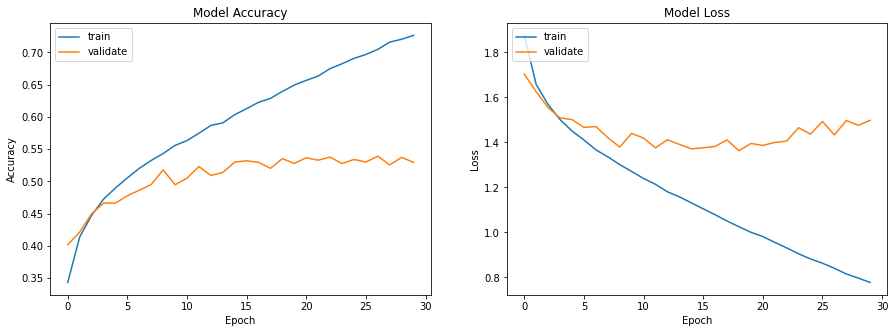

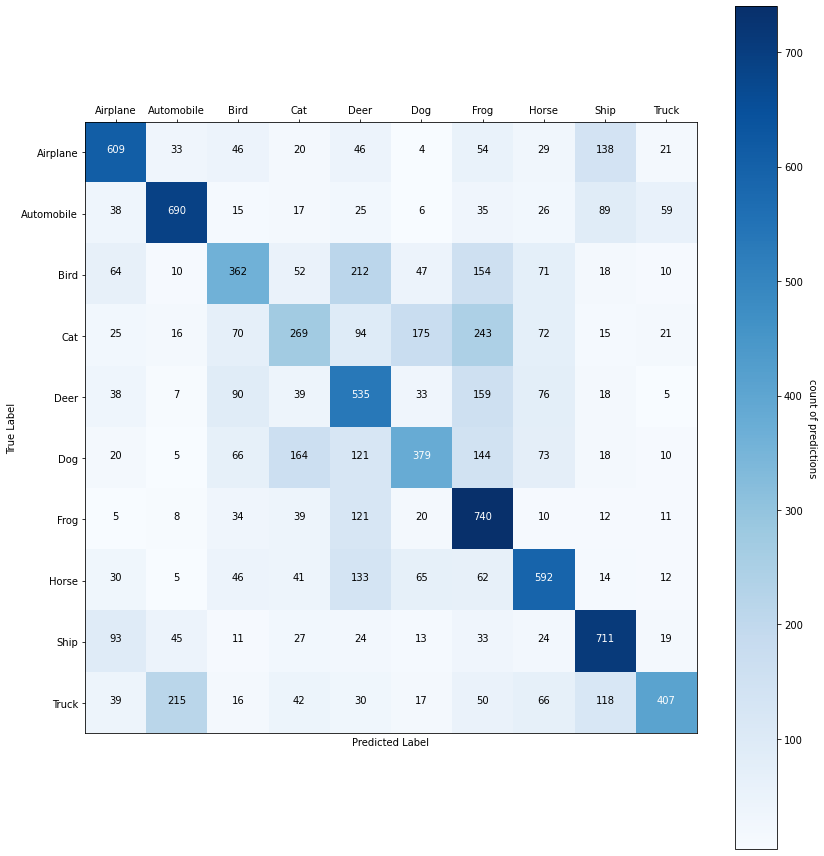

In [ ]:
model = create_model(learning_rate=0.001, optimizer='adamax')
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
# save_model(model, 'best_activation')

# Test Model Layer Number
***Different Number Of Layer***
the best layer number here is 3, in practice more than 3 has more capacity than 3, but overfitting and gradient vanishing is big problem that we have.

In [ ]:
from tensorflow.keras.layers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(number_of_layers=1):
    inputs = keras.Input(shape=(32, 32 ,3))
    x = Flatten()(inputs)
    for i in range(number_of_layers):
        x = Dense(units=1024, activation='softplus')(x)
    outputs = Dense(units=10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"],
    )
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)
number_of_layers = [1, 2, 3, 4, 5, 6, 7]
param_grid = dict(number_of_layers=number_of_layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train[:10000], y_train[:10000])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.426898 using {'number_of_layers': 3}
0.411999 (0.005226) with: {'number_of_layers': 1}
0.402699 (0.020076) with: {'number_of_layers': 2}
0.426898 (0.016062) with: {'number_of_layers': 3}
0.410800 (0.010771) with: {'number_of_layers': 4}
0.410302 (0.016366) with: {'number_of_layers': 5}
0.389601 (0.015237) with: {'number_of_layers': 6}
0.371802 (0.012293) with: {'number_of_layers': 7}


***Layer Number = 3***
* ***result:*** this model is overfitting, because loss on train decrease, but in validation is increasing.

Epoch 1/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8718 - accuracy: 0.3209 - val_loss: 1.6636 - val_accuracy: 0.3986
Epoch 2/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6424 - accuracy: 0.4084 - val_loss: 1.5642 - val_accuracy: 0.4452
Epoch 3/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5422 - accuracy: 0.4427 - val_loss: 1.5400 - val_accuracy: 0.4439
Epoch 4/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4762 - accuracy: 0.4666 - val_loss: 1.5036 - val_accuracy: 0.4642
Epoch 5/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4302 - accuracy: 0.4869 - val_loss: 1.4874 - val_accuracy: 0.4729
Epoch 6/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3847 - accuracy: 0.4997 - val_loss: 1.4731 - val_accuracy: 0.4768
Epoch 7/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3472 - accuracy: 0.5155 - val_loss: 1.4359 - val_ac

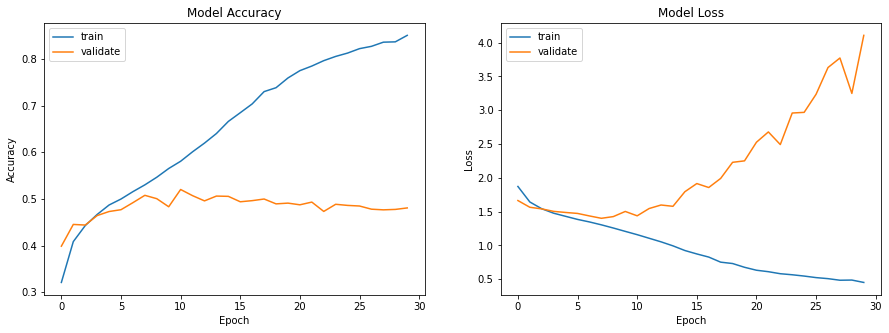

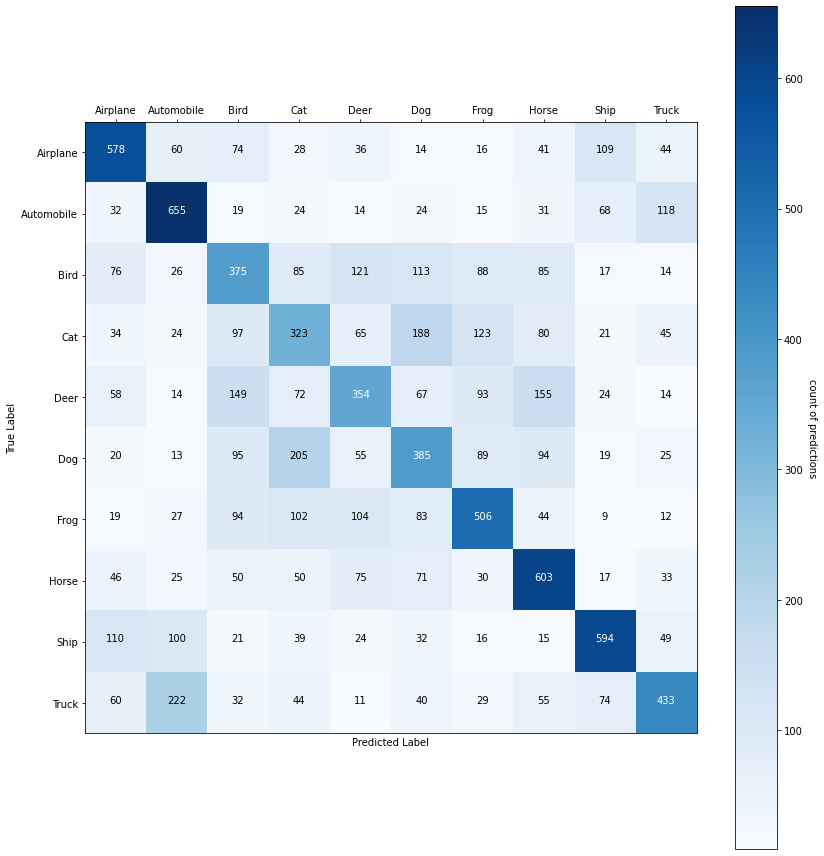

In [ ]:
model = create_model(3)
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
# save_model(model, 'best_layer_number')

# Test Model Epochs && Batch Size
***Epochs && Batch Size***
* ***result:*** best batch size is 128, about epoch: with increasing epoch number is trivial to increase accuracy on train, but probabilty of overfitting is increasing. here best on is 30.

In [ ]:
from tensorflow.keras.layers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model():
    inputs = keras.Input(shape=(32, 32 ,3))
    x = Flatten()(inputs)
    x = Dense(units=512, activation='softplus')(x)
    x = Dense(units=1024, activation='softplus')(x)
    x = Dense(units=512, activation='softplus')(x)
    outputs = Dense(units=10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"],
    )
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

batch_size = [16, 32, 64, 128, 256, 512]
epochs = [10, 15, 20, 25, 30]

param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train[:10000], y_train[:10000])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.429900 using {'batch_size': 64, 'epochs': 30}
0.389001 (0.009129) with: {'batch_size': 16, 'epochs': 10}
0.403501 (0.010483) with: {'batch_size': 16, 'epochs': 15}
0.399398 (0.015138) with: {'batch_size': 16, 'epochs': 20}
0.406000 (0.006927) with: {'batch_size': 16, 'epochs': 25}
0.404000 (0.002254) with: {'batch_size': 16, 'epochs': 30}
0.372500 (0.002896) with: {'batch_size': 32, 'epochs': 10}
0.422199 (0.004747) with: {'batch_size': 32, 'epochs': 15}
0.426500 (0.003101) with: {'batch_size': 32, 'epochs': 20}
0.423199 (0.004571) with: {'batch_size': 32, 'epochs': 25}
0.405200 (0.016404) with: {'batch_size': 32, 'epochs': 30}
0.389200 (0.012125) with: {'batch_size': 64, 'epochs': 10}
0.414398 (0.013921) with: {'batch_size': 64, 'epochs': 15}
0.413699 (0.009743) with: {'batch_size': 64, 'epochs': 20}
0.425600 (0.007397) with: {'batch_size': 64, 'epochs': 25}
0.429900 (0.001471) with: {'batch_size': 64, 'epochs': 30}
0.375200 (0.011611) with: {'batch_size': 128, 'epochs': 10}
0

***epochs=30 && batch_size=64***
* ***result:*** model has been overfitted.

Epoch 1/30
782/782 [==============================] - 5s 6ms/step - loss: 1.9067 - accuracy: 0.3106 - val_loss: 1.7055 - val_accuracy: 0.3807
Epoch 2/30
782/782 [==============================] - 4s 6ms/step - loss: 1.6567 - accuracy: 0.4017 - val_loss: 1.5880 - val_accuracy: 0.4341
Epoch 3/30
782/782 [==============================] - 4s 5ms/step - loss: 1.5596 - accuracy: 0.4377 - val_loss: 1.5025 - val_accuracy: 0.4675
Epoch 4/30
782/782 [==============================] - 4s 5ms/step - loss: 1.4861 - accuracy: 0.4650 - val_loss: 1.4737 - val_accuracy: 0.4757
Epoch 5/30
782/782 [==============================] - 4s 5ms/step - loss: 1.4459 - accuracy: 0.4800 - val_loss: 1.4611 - val_accuracy: 0.4833
Epoch 6/30
782/782 [==============================] - 4s 6ms/step - loss: 1.3945 - accuracy: 0.4987 - val_loss: 1.4547 - val_accuracy: 0.4847
Epoch 7/30
782/782 [==============================] - 5s 6ms/step - loss: 1.3583 - accuracy: 0.5122 - val_loss: 1.4252 - val_accuracy: 0.4882
Epoch 

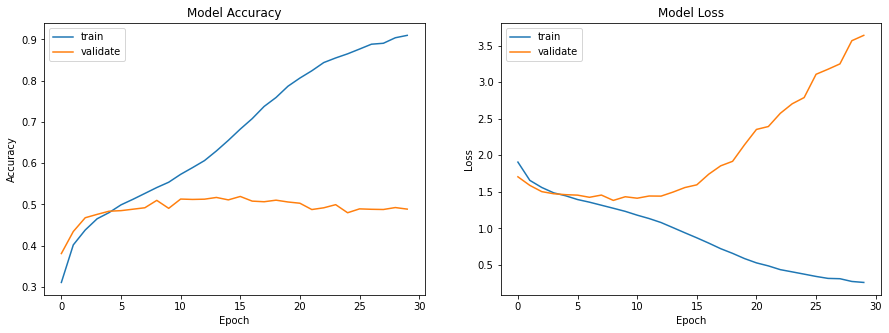

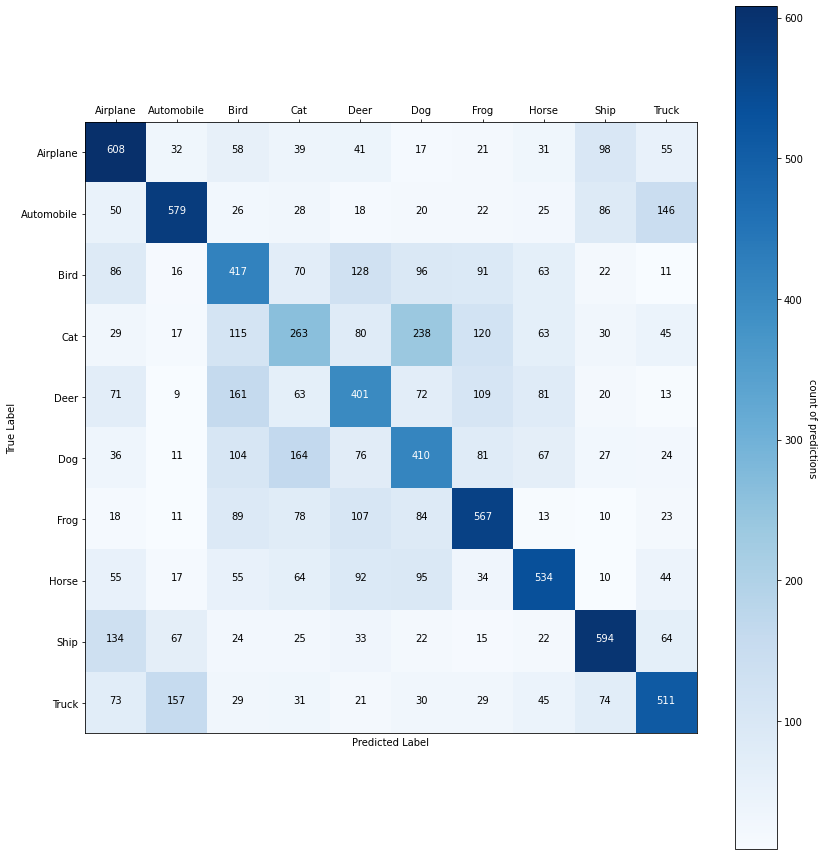

In [ ]:

model = create_model()
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
# save_model(model, 'best_layer_number')

# Final Model Overfitted
* ***result:*** this model has beed overfited on data. because of increasing loss of validation data and decreasing on training data.

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_33 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_34 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_35 (Dense)             (None, 10)                10250     
Total params: 7,354,378
Trainable params: 7,354,378
Non-trainable params: 0
________________________________________________

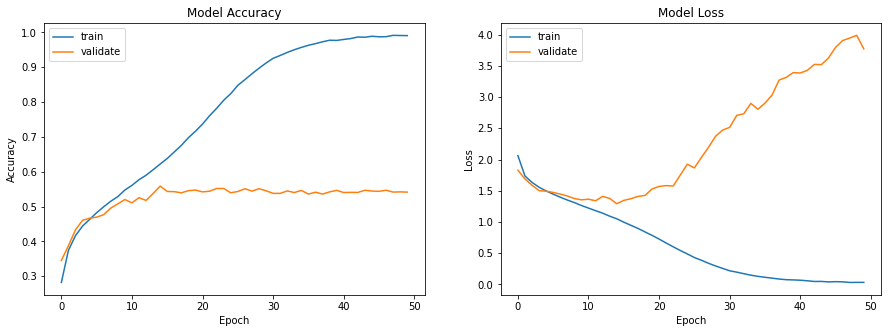

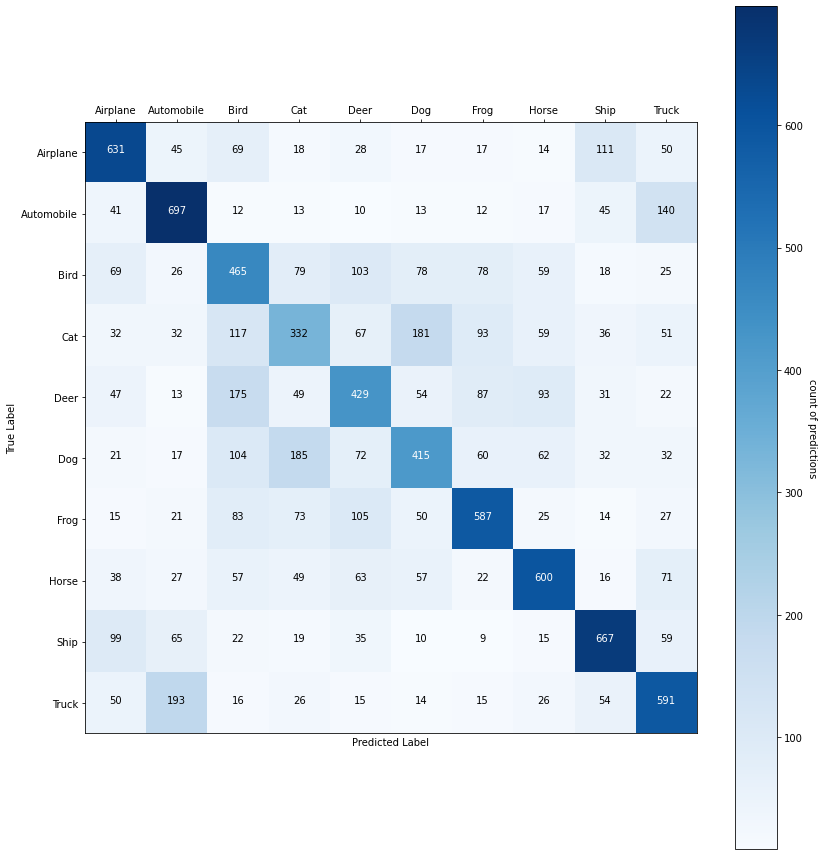

Saved trained model at /content/saved_models/1.h5 


In [ ]:
from tensorflow.keras.layers import *

regularizer=keras.regularizers.l2(1e-3)

inputs = keras.Input(shape=(32, 32 ,3))
x = Flatten()(inputs)
x = Dense(units=1024, activation='softplus')(x)
x = Dense(units=2048, activation='softplus')(x)
x = Dense(units=1024, activation='softplus')(x)
outputs = Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=["accuracy"],
)


history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), verbose=1)

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
save_model(model, '1')

# Reduced Model Capacity to avoid overfiting

* ***result:*** no help to prevent overfiting.

* CIFAR data is so complicated to a model of Dense layer. we need powerful layer to work on image and pay attention on local feature and locality on image.

* model with overfiting has better performance even of validation.

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_41 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_43 (Dense)             (None, 10)                2570      
Total params: 1,052,170
Trainable params: 1,052,170
Non-trainable params: 0
________________________________________________

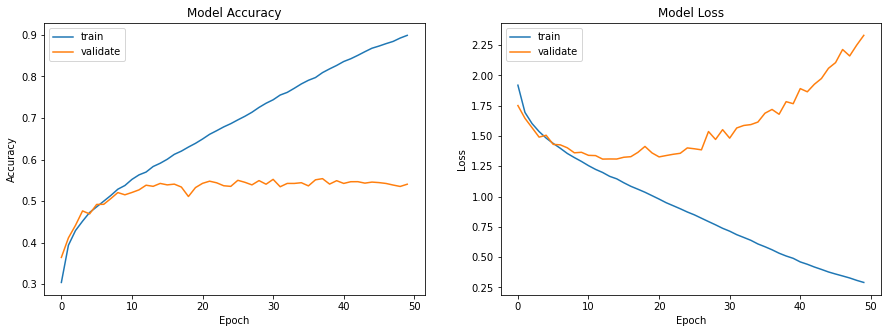

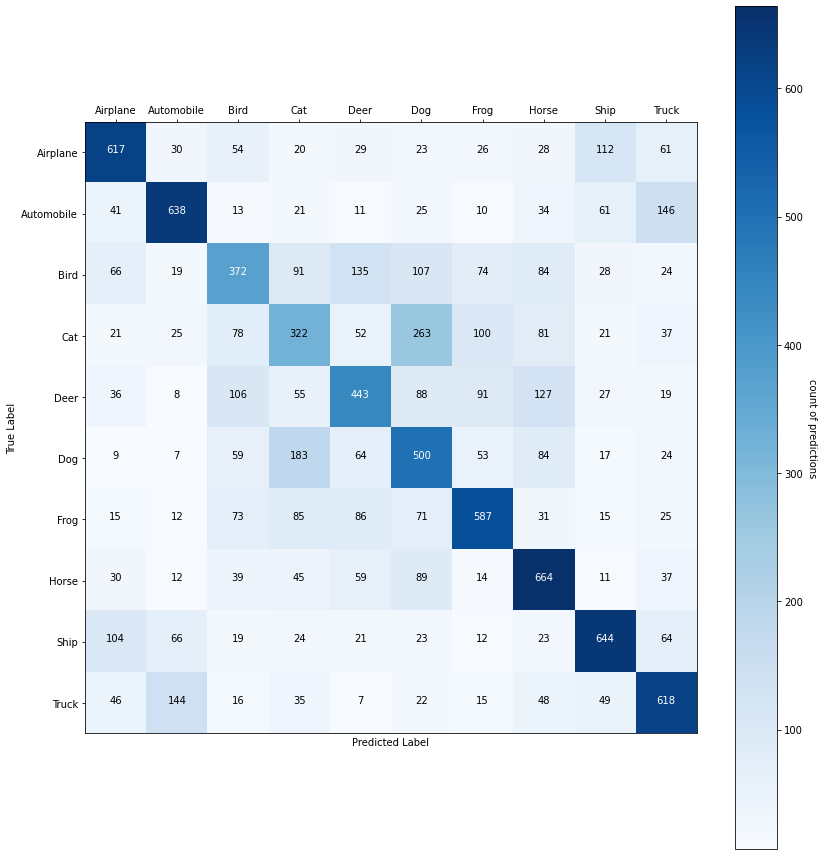

Saved trained model at /content/saved_models/2.h5 


In [ ]:
from tensorflow.keras.layers import *

inputs = keras.Input(shape=(32, 32 ,3))
x = Flatten()(inputs)
x = Dense(units=256, activation='softplus')(x)
x = Dense(units=512, activation='softplus')(x)
x = Dense(units=256, activation='softplus')(x)
outputs = Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=["accuracy"],
)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), verbose=1)

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
save_model(model, '2')

* ***result:*** Reduced model capacity:  no help to prevent overfiting.

* CIFAE data is so complicated to a model of Dense layer. we need powerfull layer to work on image and pay attention on local feature and locallity on image. 
* model with overfiting has better performance even of validation.

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_49 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_51 (Dense)             (None, 10)                1290      
Total params: 460,554
Trainable params: 460,554
Non-trainable params: 0
____________________________________________________

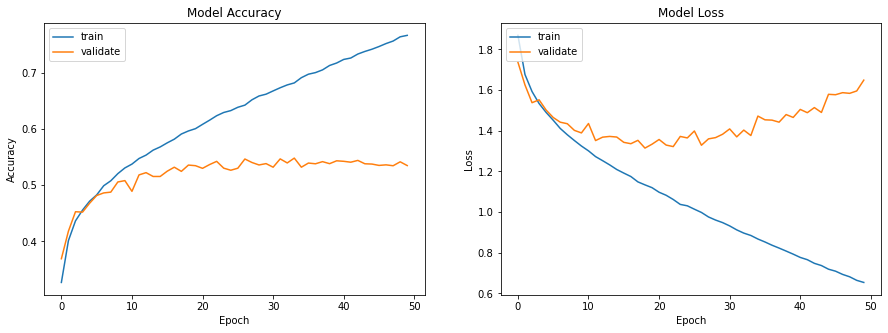

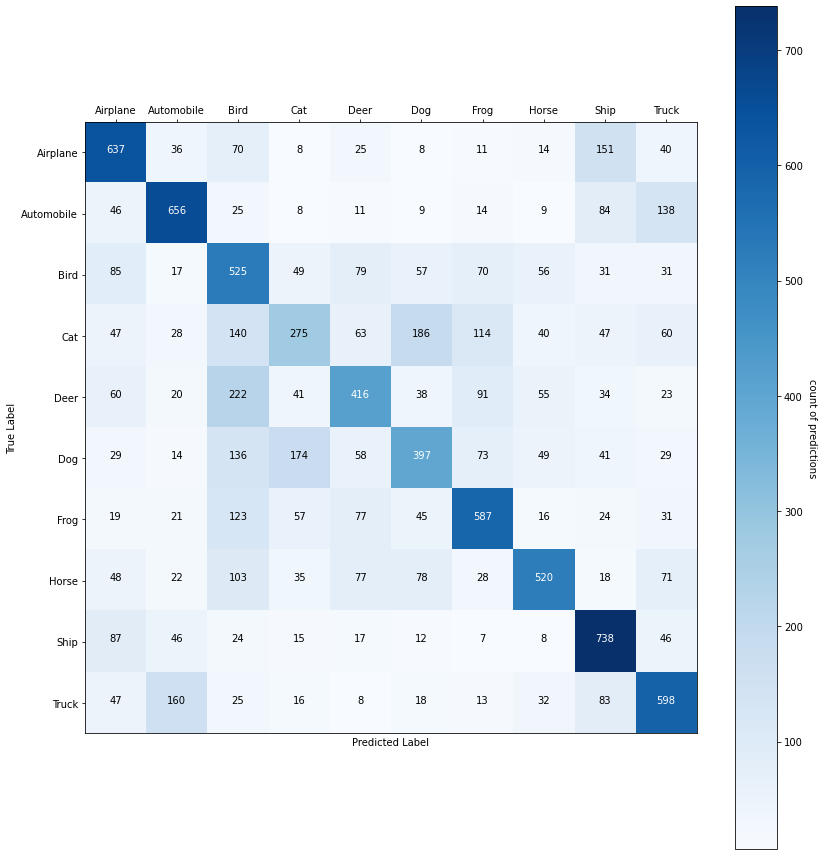

Saved trained model at /content/saved_models/3.h5 


In [ ]:
from tensorflow.keras.layers import *


inputs = keras.Input(shape=(32, 32 ,3))
x = Flatten()(inputs)
x = Dense(units=128, activation='softplus')(x)
x = Dense(units=256, activation='softplus')(x)
x = Dense(units=128, activation='softplus')(x)
outputs = Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adamax(learning_rate=0.001),
    metrics=["accuracy"],
)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), verbose=1)


classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
save_model(model, '3')

# Regulizer Norm L2 to avoid overfiting

* ***result:*** act better than Reduced capacity.
* L2 regularization forces weights toward zero but it does not make them exactly zero. L2 regularization acts like a force that removes a small percentage of weights at each iteration. Therefore, weights will never be equal to zero.

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_53 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_54 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_55 (Dense)             (None, 10)                5130      
Total params: 2,628,618
Trainable params: 2,628,618
Non-trainable params: 0
________________________________________________

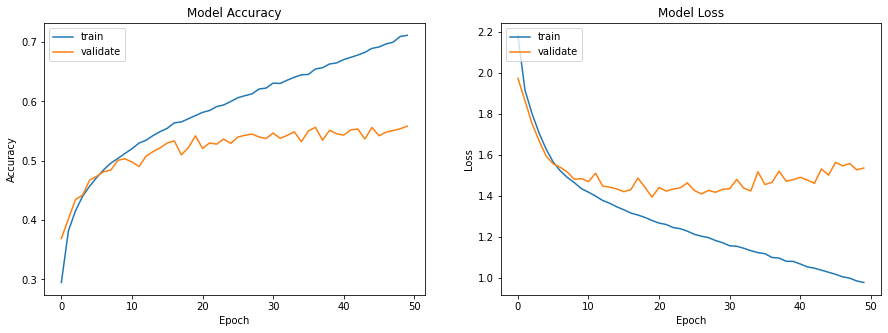

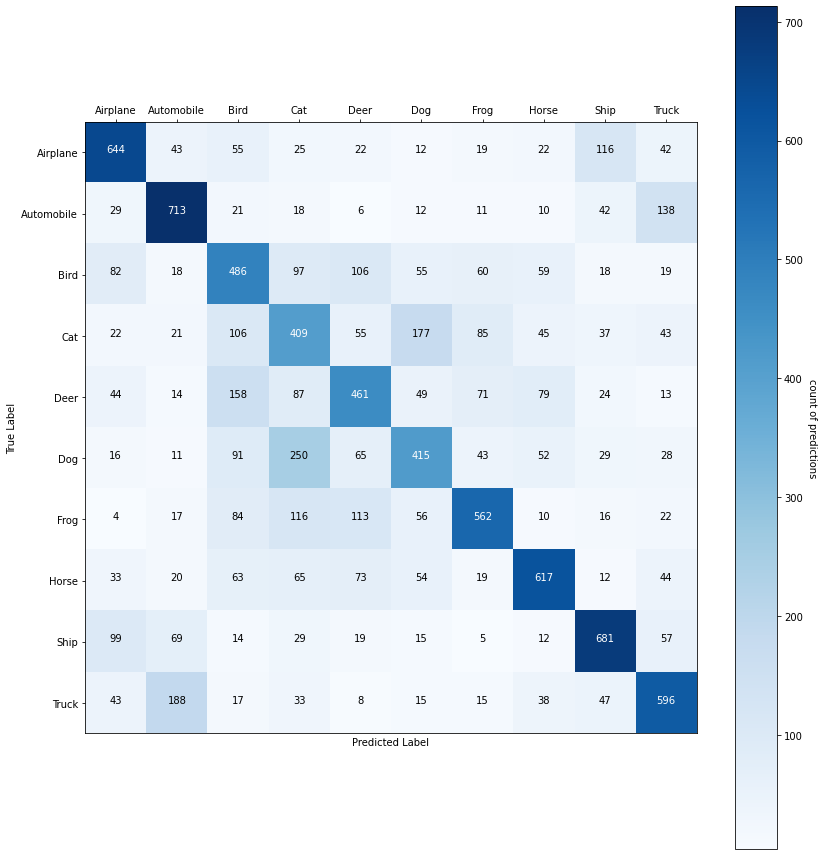

Saved trained model at /content/saved_models/4.h5 


In [ ]:
from tensorflow.keras.layers import *

regularizer=keras.regularizers.l2(1e-4)

inputs = keras.Input(shape=(32, 32 ,3))
x = Flatten()(inputs)
x = Dense(units=512, activation='softplus', kernel_regularizer=regularizer)(x)
x = Dense(units=1024, activation='softplus', kernel_regularizer=regularizer)(x)
x = Dense(units=512, activation='softplus', kernel_regularizer=regularizer)(x)
outputs = Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adamax(learning_rate=0.001),
    metrics=["accuracy"],
)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), verbose=1)


classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
save_model(model, '4')

# Dropout to avoid overfiting

***result:***
* act better than regulatization and Dropout.

***Dropout:***

* In each forward pass, randomly set some neurons to zero

* Probability of dropping is a hyperparameter; 0.5 is common

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 1024)              209

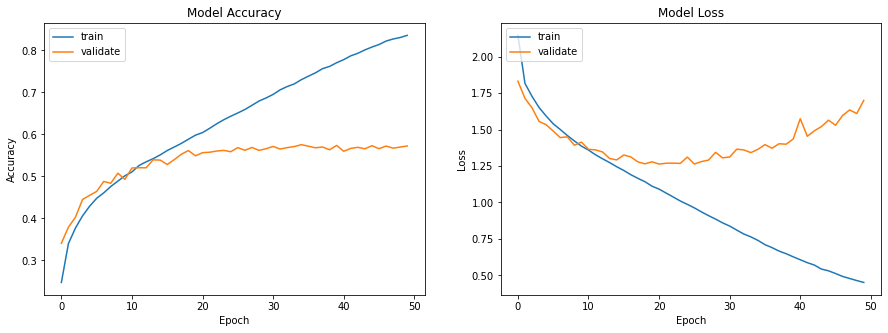

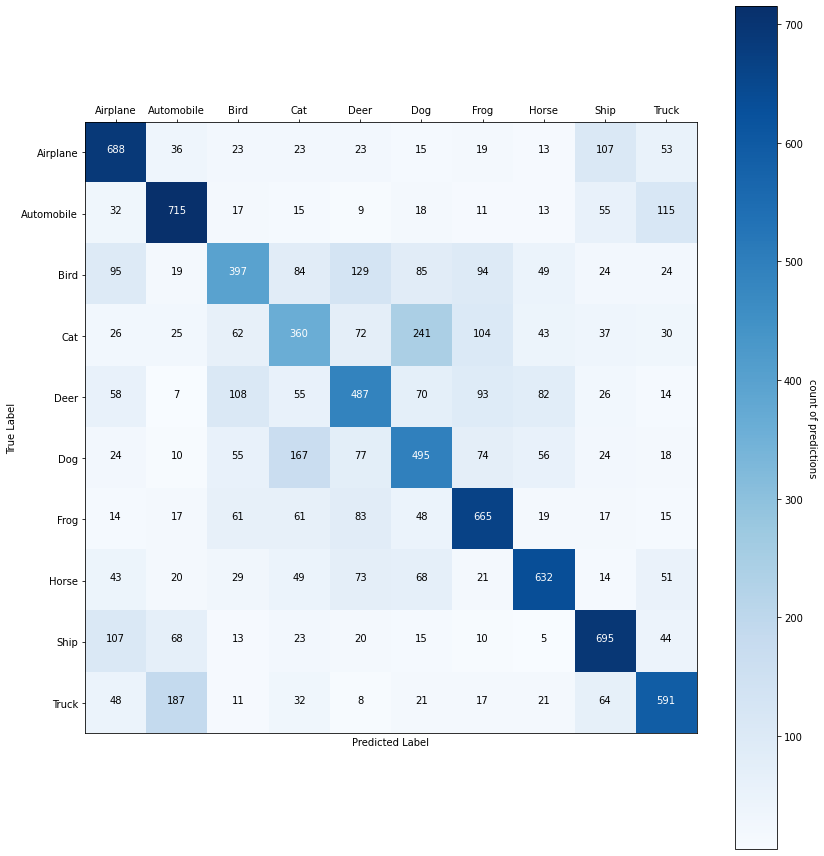

Saved trained model at /content/saved_models/5.h5 


In [ ]:
from tensorflow.keras.layers import *

regularizer=keras.regularizers.l2(1e-3)

inputs = keras.Input(shape=(32, 32 ,3))
x = Flatten()(inputs)
x = Dense(units=1024, activation='softplus')(x)
x = Dropout(0.2)(x)
x = Dense(units=2048, activation='softplus')(x)
x = Dropout(0.2)(x)
x = Dense(units=1024, activation='softplus')(x)
x = Dropout(0.2)(x)
outputs = Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=["accuracy"],
)


history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), verbose=1)

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
save_model(model, '5')

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               1313

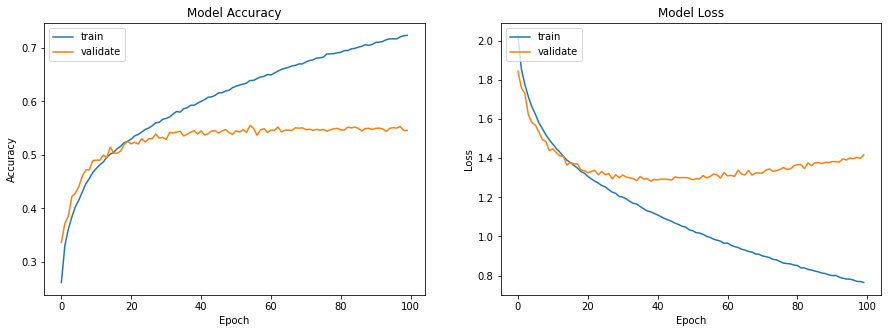

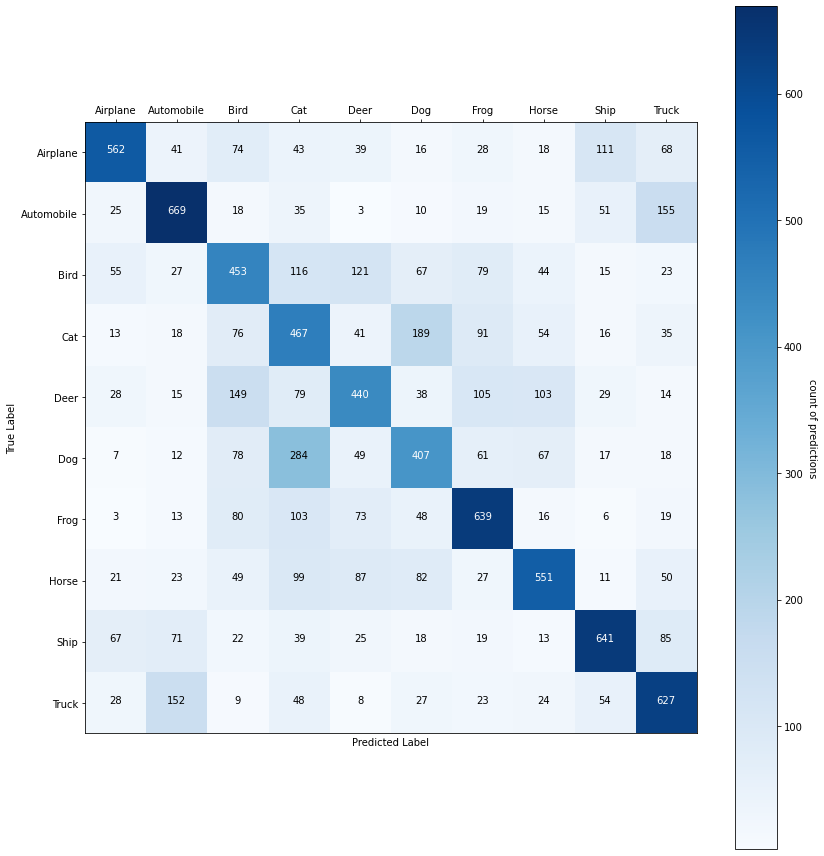

Saved trained model at /content/saved_models/7.h5 


In [14]:
from tensorflow.keras.layers import *

inputs = keras.Input(shape=(32, 32 ,3))
x = Flatten()(inputs)
x = Dense(units=256, activation='softplus')(x)
x = Dropout(0.2)(x)
x = Dense(units=512, activation='softplus')(x)
x = Dropout(0.2)(x)
x = Dense(units=256, activation='softplus')(x)
outputs = Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=["accuracy"],
)
history = model.fit(x_train, y_train, batch_size=128, epochs=100,  validation_data=(x_test, y_test), verbose=1)

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
save_model(model, '7')

# Increase Data Size with augmentation to avoid overfitting 

***Teacher Guide:***
* Create 180 degree rotated image to Increase Dataset. 

* Because of limited amount of memory in google colab i do not use 90 , 270 degree.(i could handle that but for simplicty i decided to Confine the 180) 

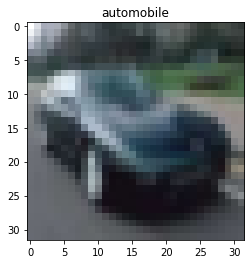

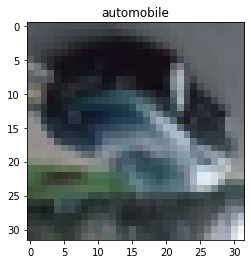

(100000, 32, 32, 3)


In [8]:
from scipy.ndimage import rotate

x_augmentation_1 = np.zeros(x_train.shape)
x_augmentation_2 = np.zeros(x_train.shape)
for i in range(x_train.shape[0]):
    x_augmentation_1[i] = np.rot90(x_train[i])
    x_augmentation_2[i] = np.rot90(x_augmentation_1[i])
    # x_augmentation_3[i] = np.rot90(x_augmentation_2[i])

img = x_train[11000]
plt.imshow(img)
plt.title(labels[np.argmax(y_train[11000])])
plt.show()
img = x_augmentation_2[11000]
plt.imshow(img)
plt.title(labels[np.argmax(y_train[11000])])
plt.show()

x_train = np.concatenate(( x_train,  x_augmentation_2), axis=0)
y_train = np.concatenate(( y_train, y_train), axis=0)
x_train, y_train =unison_shuffle(x_train, y_train)

print(x_train.shape)

# Keras Functional API to avoid gradient vanishing

* create a specific model (idea from ***ResNet*** model)
* no good effort of perfomance(acc, loss) of model.

Epoch 1/50
782/782 [==============================] - 4s 5ms/step - loss: 2.1423 - accuracy: 0.2337 - val_loss: 1.8837 - val_accuracy: 0.3178
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.9045 - accuracy: 0.3064 - val_loss: 1.7976 - val_accuracy: 0.3502
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8152 - accuracy: 0.3451 - val_loss: 1.6998 - val_accuracy: 0.3847
Epoch 4/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7420 - accuracy: 0.3742 - val_loss: 1.6623 - val_accuracy: 0.4045
Epoch 5/50
782/782 [==============================] - 3s 4ms/step - loss: 1.6841 - accuracy: 0.3934 - val_loss: 1.5893 - val_accuracy: 0.4318
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss: 1.6326 - accuracy: 0.4139 - val_loss: 1.5591 - val_accuracy: 0.4434
Epoch 7/50
782/782 [==============================] - 3s 4ms/step - loss: 1.5941 - accuracy: 0.4276 - val_loss: 1.5240 - val_accuracy: 0.4568
Epoch 

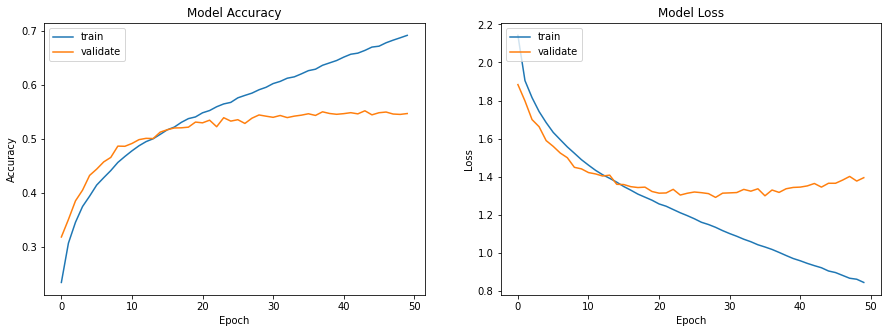

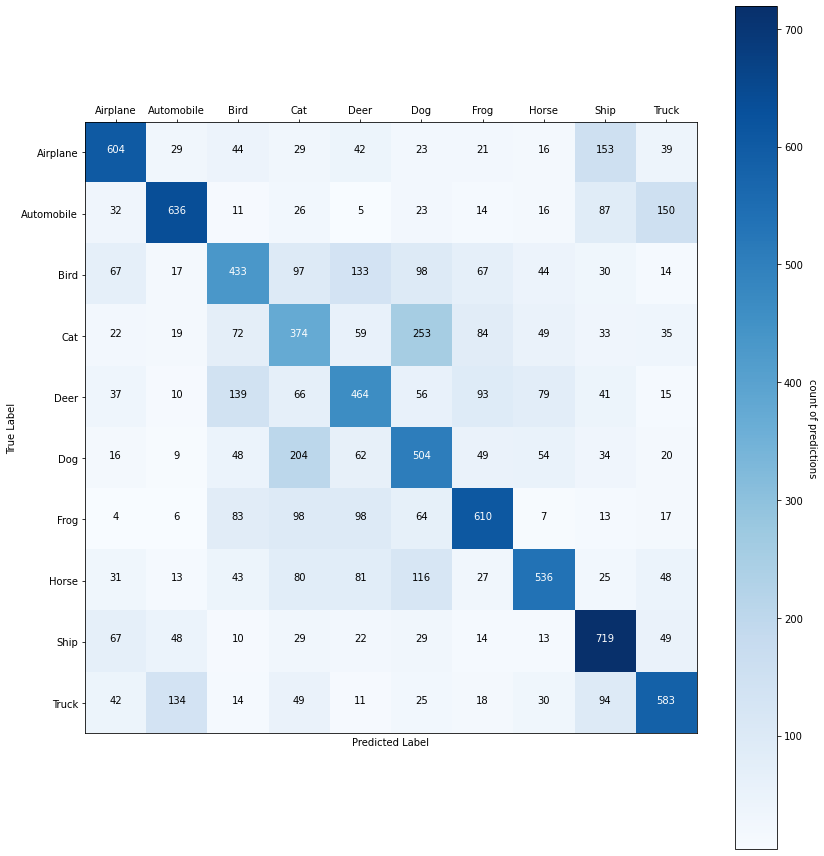

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved trained model at /content/saved_models/12.h5 


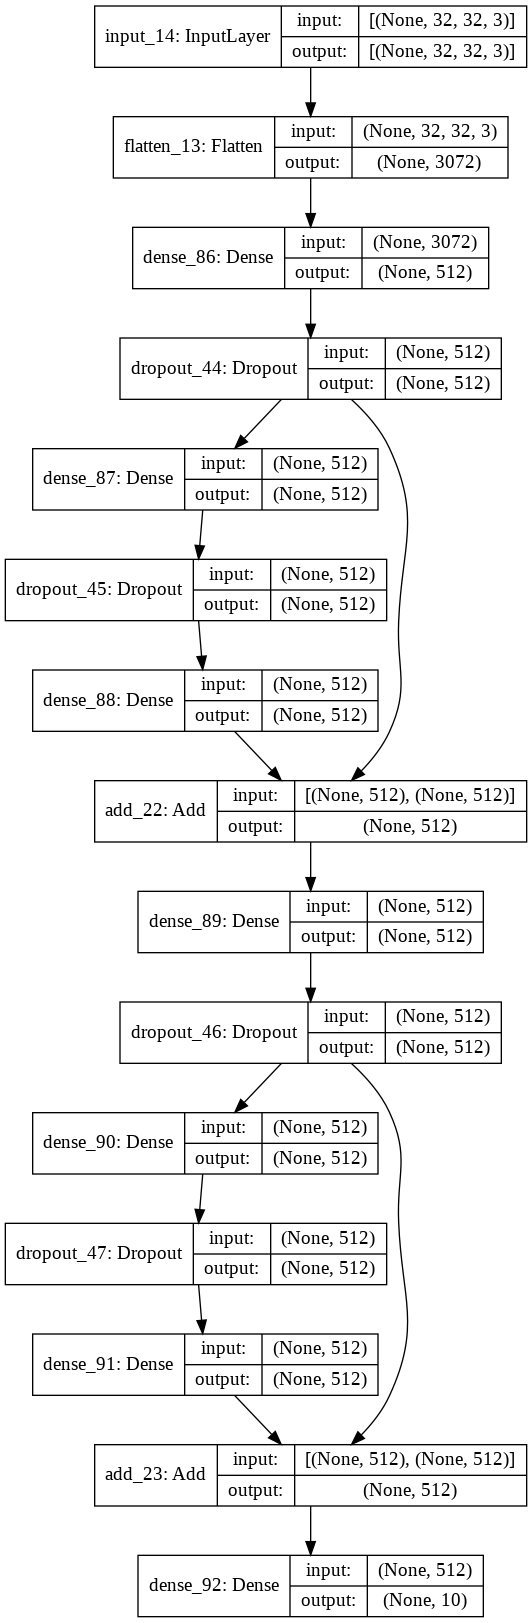

In [22]:
from tensorflow.keras.layers import *

inputs = keras.Input(shape=(32, 32 ,3))
a = Flatten()(inputs)
b = Dense(units=512, activation='softplus')(a)
b = Dropout(0.2)(b)
c = Dense(units=512, activation='softplus')(b)
c = Dropout(0.2)(c)
d = Dense(units=512, activation='softplus')(c)
d = add([d, b])
e = Dense(units=512, activation='softplus')(d)
e = Dropout(0.2)(e)
f = Dense(units=512, activation='softplus')(e)
f = Dropout(0.2)(f)
g = Dense(units=512, activation='softplus')(f)
g = add([g, e])
outputs = Dense(units=10, activation='softmax')(g)

model = keras.Model(inputs=inputs, outputs=outputs, name='mini_resnet')

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=1)

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
save_model(model, '12')
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)


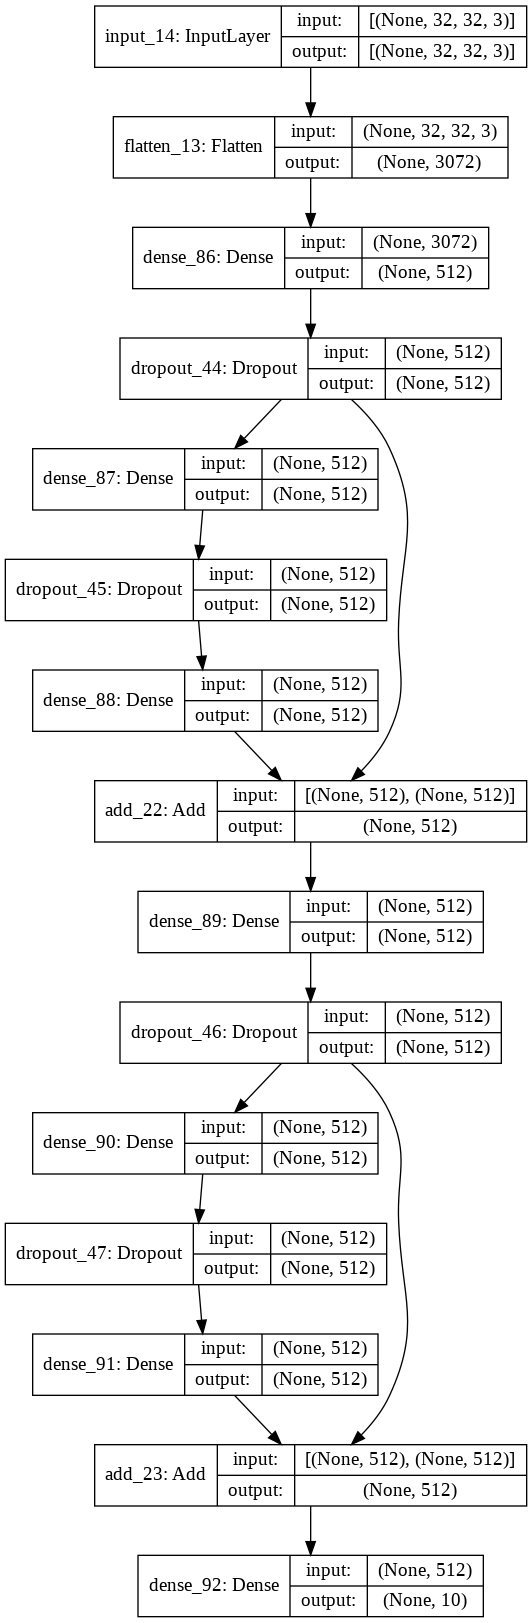

In [23]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
flatten_14 (Flatten)            (None, 3072)         0           input_15[0][0]                   
__________________________________________________________________________________________________
dense_93 (Dense)                (None, 128)          393344      flatten_14[0][0]                 
__________________________________________________________________________________________________
dense_94 (Dense)                (None, 128)          16512       dense_93[0][0]                   
____________________________________________________________________________________________

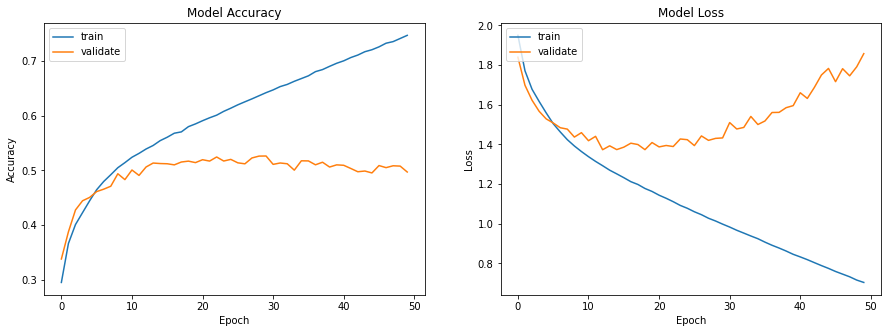

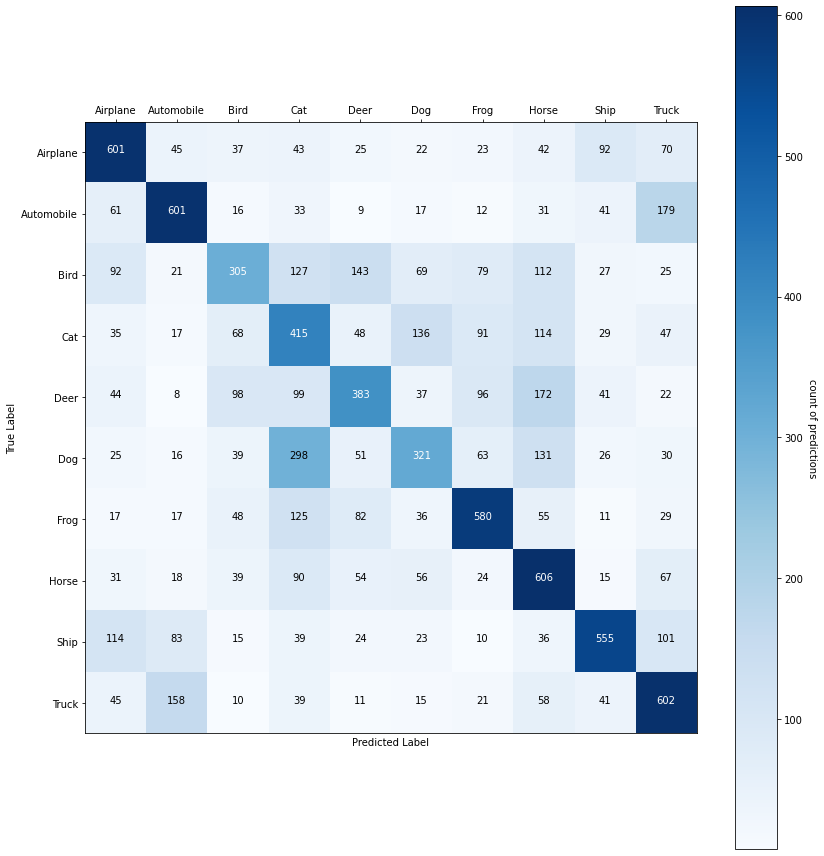

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved trained model at /content/saved_models/12.h5 


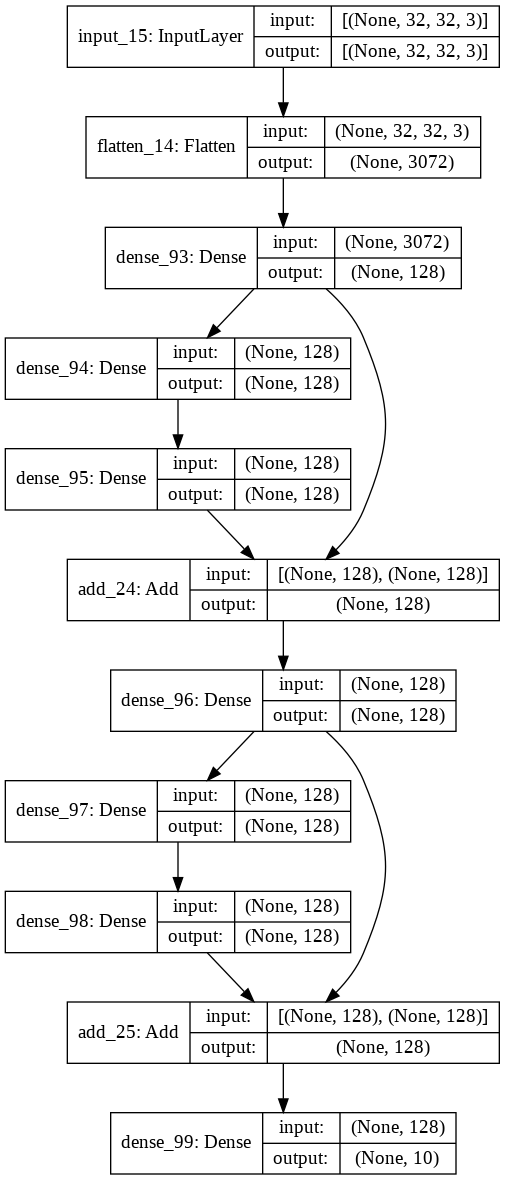

In [24]:
from tensorflow.keras.layers import *

inputs = keras.Input(shape=(32, 32 ,3))
a = Flatten()(inputs)
b = Dense(units=128, activation='softplus')(a)
c = Dense(units=128, activation='softplus')(b)
d = Dense(units=128, activation='softplus')(c)
d = add([d, b])
e = Dense(units=128, activation='softplus')(d)
f = Dense(units=128, activation='softplus')(e)
g = Dense(units=128, activation='softplus')(f)
g = add([g, e])
outputs = Dense(units=10, activation='softmax')(g)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), verbose=1)

classification_report(model, y_test, x_test)
plotmodelhistory(history)
confusion_matrix(model, x_test, y_test)
save_model(model, '12')
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

# K-Fold-Cross-Validation

* just for test.
* dataset reloaded because of privious change of data.

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
from tensorflow import keras
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 25
optimizer = Adam()
verbosity = 1
num_folds = 10

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  inpu = keras.Input(shape=(32, 32 ,3))
  x = Flatten()(inpu)
  x = Dense(units=256, activation='softplus')(x)
  x = Dropout(0.2)(x)
  x = Dense(units=512, activation='softplus')(x)
  x = Dropout(0.2)(x)
  x = Dense(units=256, activation='softplus')(x)
  x = Dropout(0.2)(x)
  outputs = Dense(units=10, activation='softmax')(x)

  model = keras.Model(inputs=inpu, outputs=outputs)

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  a = inputs[train]
  print(a.shape)
  b = targets[train]
  print(b.shape)
  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
(54000, 32, 32, 3)
(54000, 1)
Epoch 1/25
1080/1080 [==============================] - 6s 3ms/step - loss: 1.9479 - accuracy: 0.2849
Epoch 2/25
1080/1080 [==============================] - 3s 3ms/step - loss: 1.7756 - accuracy: 0.3551
Epoch 3/25
1080/1080 [==============================] - 3s 3ms/step - loss: 1.7094 - accuracy: 0.3813
Epoch 4/25
1080/1080 [==============================] - 3s 3ms/step - loss: 1.6576 - accuracy: 0.4006
Epoch 5/25
1080/1080 [==============================] - 3s 3ms/step - loss: 1.6254 - accuracy: 0.4135
Epoch 6/25
1080/1080 [==============================] - 3s 3ms/step - loss: 1.5985 - accuracy: 0.4231
Epoch 7/25
1080/1080 [==============================] - 3s 3ms/step - loss: 1.5770 - accuracy: 0.4330
Epoch 8/25
1080/1080 [==============================] - 3s 3ms/step - loss: 1.5614 - accuracy: 0.4378
Epoch 9/25
1080/1080 [==============================] - 3